# Train DS/MLE Job Classifier
## ABB #3 - Session 2

Code authored by: Shaw Talebi

### imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import numpy as np

### load data

In [2]:
df = pd.read_csv("data/job_data_transformed.csv")

# keep only numberical columns
df = df.iloc[:,6:]

In [3]:
df.head()

,statistics_count,data visualization_count,sql_count,pandas_count,numpy_count,scikit-learn_count,hypothesis testing_count,eda_count,a/b testing_count,tableau_count,...,docker_count,kubernetes_count,api_count,tensorflow_count,pytorch_count,ci/cd_count,aws_count,gcp_count,distributed computing_count,is_data_scientist
0,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,True
1,0,0,1,0,0,0,0,0,0,0,...,0,0,17,0,0,0,4,0,0,True
2,0,0,0,1,0,1,0,0,0,0,...,1,1,1,1,1,0,2,1,0,True
3,1,1,1,0,0,1,0,0,0,1,...,0,0,0,1,1,1,0,0,0,True
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,True


### train-test split

In [4]:
# split data by predictors and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### train Logistic Regression classifier 

In [5]:
# train logistic regression model
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_train, y_train)

In [12]:
# compute accuracy
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.7904411764705882
Test Accuracy: 0.782608695652174


In [13]:
# predict AUC
train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

print("Train AUC:", train_auc)
print("Test AUC:", test_auc)

Train AUC: 0.854799415299659
Test AUC: 0.7983449477351916


#### Visualize Coefficients

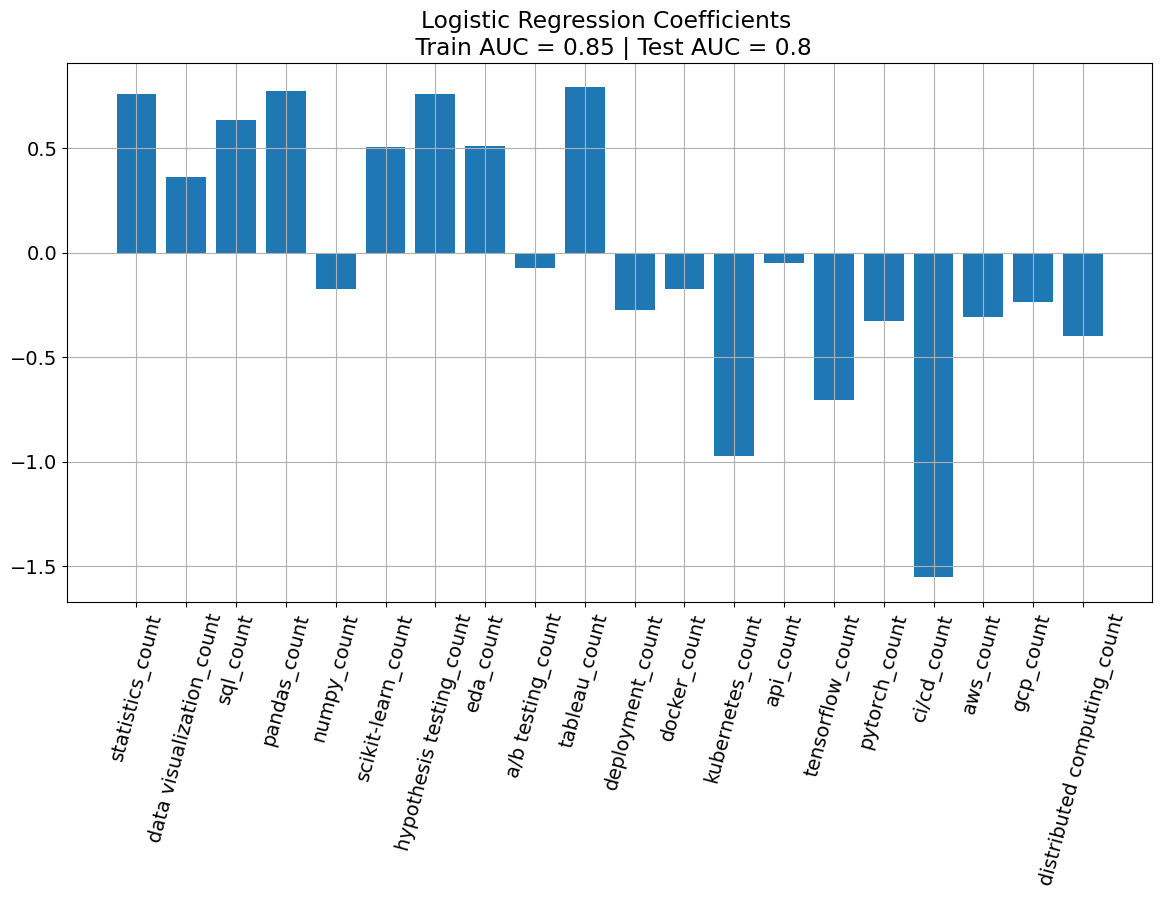

In [8]:
# plot model coefficents
num_vars = len(X.columns)

plt.figure(figsize=(14, 7))
plt.rcParams.update({'font.size': 14})

plt.bar(np.linspace(1,num_vars,num_vars), clf.coef_[0])
plt.grid()
plt.xticks(np.linspace(1,num_vars,num_vars), X.columns, rotation=75)
plt.title(f"Logistic Regression Coefficients \n Train AUC = {round(train_auc,2)} | Test AUC = {round(test_auc,2)}")
plt.show()

#### ROC Curve

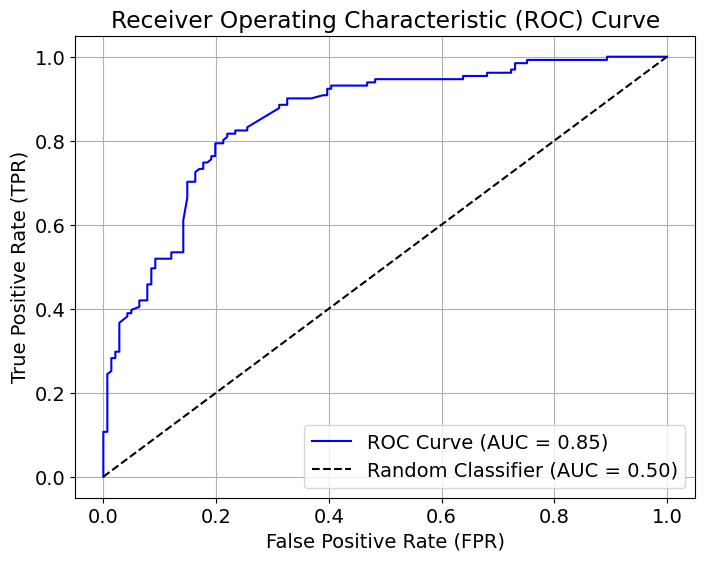

In [9]:
# Generate predicted probabilities
y_pred_prob = clf.predict_proba(X_train)[:, 1]  # Predicted probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
roc_auc = roc_auc_score(y_train, y_pred_prob)  # Compute AUC (Area Under the Curve)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()